# Checking dominant genotype and introgressions in *durum x dicoccoides* RIL lines

In [139]:
from Bio import AlignIO
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [19]:
targets=dict()
targets={
    "A":["WW-178"],
    "B":["WW-179"],
    "AxB":["WW-180","WW-181","WW-182"]
}

In [297]:
def check_anc(col):
    A=targets2["A"][0]
    B=targets2["B"][0]
    return(col[A] in [b"A",b"C",b"G",b"T"] and col[B] in [b"A",b"C",b"G",b"T"] and col[A]!=col[B])
def which_anc(x,A,B):
    if x==A:
        return(b"A")
    elif x==B:
        return(b"B")
    else:
        return(b"C")

def get_states (col):
    A=col[0]
    B=col[1]
    idx=range(0,2)
    mask=np.full(len(col),True)
    mask[idx]=False
    R=col[mask]
    X=list()
    for i in range(0,len(R)):
        X.append(which_anc(R[i],A,B))
    return(np.array(X))

In [313]:
K=list()
for g in ["A","B"]:
    for c in range(1,8):
        a = AlignIO.read("iupac/{g}_chromosomes/chr{c}{g}.fasta".format(c=c,g=g), "fasta")
        aa = np.array(a, np.character)
        aa=aa[targets2["A"]+targets2["B"] + targets2["AxB"] ][:,np.apply_along_axis(check_anc,0,aa)]
        o=np.apply_along_axis(get_states,0,aa)
        o=pd.DataFrame(o).apply(lambda x:x.value_counts(),axis=1)
        o.columns=["durum","dicoccoides","other"]
        o["genome"]=g
        o["chr"]=c
        o["genotype"]=targets["AxB"]
        o.set_index(["genotype","genome","chr"])
        K.append(o)
K=pd.concat(K)

The above code calculates the absolute number of sites in the ***durum X dicoccoides*** offspring harbouring each parental state (durum|dicoccoides|other). "other" can be either a gap, heterozygous or other i.e. mutation. Considered are only sites where the parental lines are defined, i.e. non-gap or non-heterozygous.

## Genotype medians

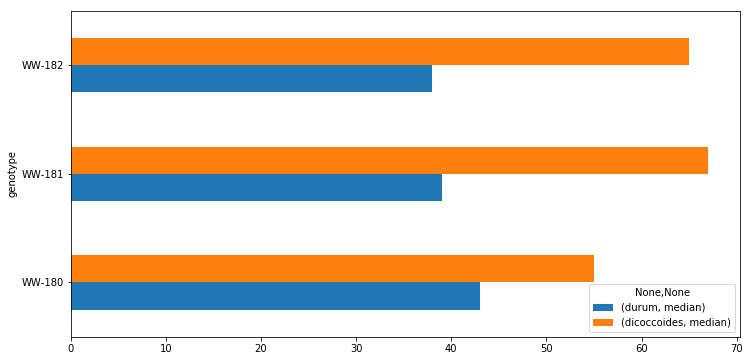

In [331]:
plt.rcParams['figure.figsize'] = (12, 6)
K.groupby(["genotype"]).agg(["median"])[["durum","dicoccoides"]].plot(kind="barh")

In [338]:
K[["genotype","durum","dicoccoides"]].groupby(["genotype"]).agg(["sum","median","mean"])

durum                   dicoccoides                  
            sum median       mean         sum median       mean
genotype                                                       
WW-180    624.0   43.0  44.571429       658.0   55.0  50.615385
WW-181    656.0   39.0  50.461538       949.0   67.0  67.785714
WW-182    573.0   38.0  47.750000      1048.0   65.0  74.857143

## Genotype:subgenome medians

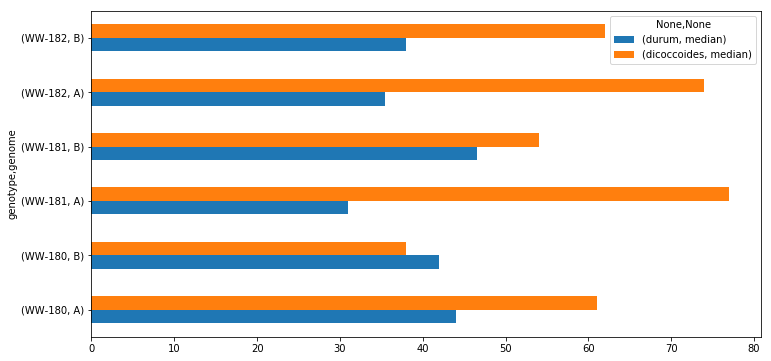

In [332]:
plt.rcParams['figure.figsize'] = (12, 6)
K.groupby(["genotype","genome"]).agg(["median"])[["durum","dicoccoides"]].plot(kind="barh")

In [339]:
K[["genotype","genome","durum","dicoccoides"]].groupby(["genotype","genome"]).agg(["sum","median","mean"])

durum                   dicoccoides                  
                   sum median       mean         sum median       mean
genotype genome                                                       
WW-180   A       264.0   44.0  37.714286       421.0   61.0  60.142857
         B       360.0   42.0  51.428571       237.0   38.0  39.500000
WW-181   A       309.0   31.0  44.142857       566.0   77.0  80.857143
         B       347.0   46.5  57.833333       383.0   54.0  54.714286
WW-182   A       294.0   35.5  49.000000       592.0   74.0  84.571429
         B       279.0   38.0  46.500000       456.0   62.0  65.142857

## Genotype:genome:chromosome

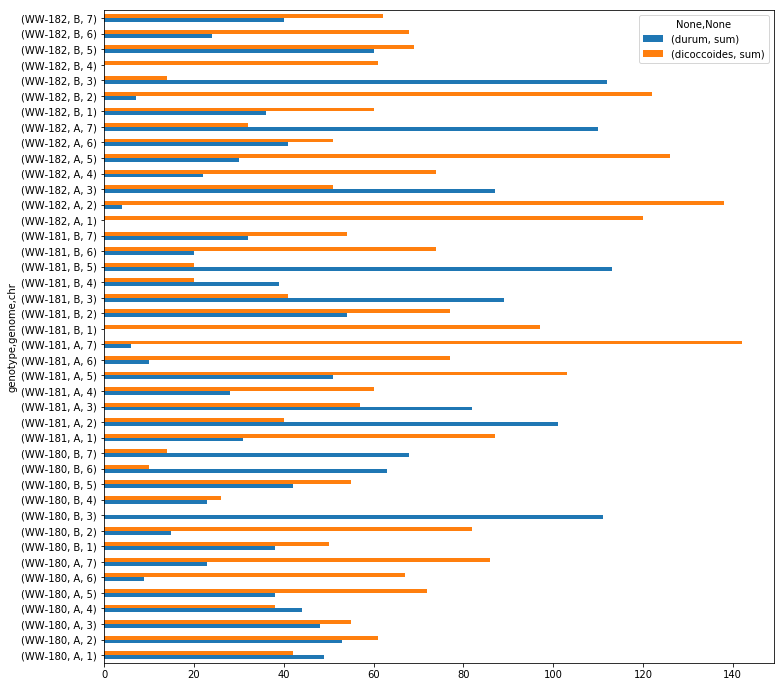

In [340]:
plt.rcParams['figure.figsize'] = (12, 12)
K.groupby(["genotype","genome","chr"]).agg(["sum"])[["durum","dicoccoides"]].plot(kind="barh")

In [341]:
K.groupby(["genotype","genome","chr"]).agg(["sum"])

durum dicoccoides other
                       sum         sum   sum
genotype genome chr                         
WW-180   A      1     49.0        42.0  36.0
                2     53.0        61.0  38.0
                3     48.0        55.0  43.0
                4     44.0        38.0  19.0
                5     38.0        72.0  55.0
                6      9.0        67.0  22.0
                7     23.0        86.0  51.0
         B      1     38.0        50.0  19.0
                2     15.0        82.0  45.0
                3    111.0         0.0  26.0
                4     23.0        26.0  19.0
                5     42.0        55.0  44.0
                6     63.0        10.0  28.0
                7     68.0        14.0  30.0
WW-181   A      1     31.0        87.0   9.0
                2    101.0        40.0  11.0
                3     82.0        57.0   7.0
                4     28.0        60.0  13.0
                5     51.0       103.0  11.0
                6     10.0        77.0  11.0
                7      6.0       142.0  12.0
         B      1      0.0        97.0  10.0
                2     54.0        77.0  11.0
                3     89.0        41.0   7.0
                4     39.0        20.0   9.0
                5    113.0        20.0   8.0
                6     20.0        74.0   7.0
                7     32.0        54.0  26.0
WW-182   A      1      0.0       120.0   7.0
                2      4.0       138.0  10.0
                3     87.0        51.0   8.0
                4     22.0        74.0   5.0
                5     30.0       126.0   9.0
                6     41.0        51.0   6.0
                7    110.0        32.0  18.0
         B      1     36.0        60.0  11.0
                2      7.0       122.0  13.0
                3    112.0        14.0  11.0
                4      0.0        61.0   7.0
                5     60.0        69.0  12.0
                6     24.0        68.0   9.0
                7     40.0        62.0  10.0